In [1]:
import pandas as pd

df=pd.read_csv('./data/fraud.csv', index_col = 0)
y = df['Class'].values
df = df.iloc[:,1:]
X = df.drop(columns = 'Class').values

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                    test_size = 0.40, 
                                    random_state=1)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#--------------------------------------------------
## ------------ SVM Classifier ------------------## 
#--------------------------------------------------

from sklearn.svm import SVC

## Linear Kernel  ---------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'linear',
                     class_weight='balanced'))]

svcL_pipeline = Pipeline(steps)
svcL_pipeline.fit(X_train, y_train)

## Polynomial Kernel -----------------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'poly', degree = 3, 
                     class_weight='balanced'))]

svcPoly_pipeline = Pipeline(steps)
svcPoly_pipeline.fit(X_train, y_train)

## RBF Kernel -----------------------
steps = [('scaler', StandardScaler()),         
         ('svc', SVC(kernel = 'rbf', gamma = 'scale',
                     class_weight='balanced'))]

svcRBF_pipeline = Pipeline(steps)
svcRBF_pipeline.fit(X_train, y_train)

,steps,"[('scaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


SVM MODEL EVALUATION RESULTS

Linear SVM Results:
----------------------------------------

Confusion Matrix:
[[8300  241]
 [  16  121]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      8541
           1       0.33      0.88      0.48       137

    accuracy                           0.97      8678
   macro avg       0.67      0.93      0.73      8678
weighted avg       0.99      0.97      0.98      8678

ROC AUC Score: 0.9515
Average Precision Score: 0.8451


Polynomial SVM Results:
----------------------------------------

Confusion Matrix:
[[8485   56]
 [  28  109]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8541
           1       0.66      0.80      0.72       137

    accuracy                           0.99      8678
   macro avg       0.83      0.89      0.86      8678
weighted avg       0.99      0.99      0.99      

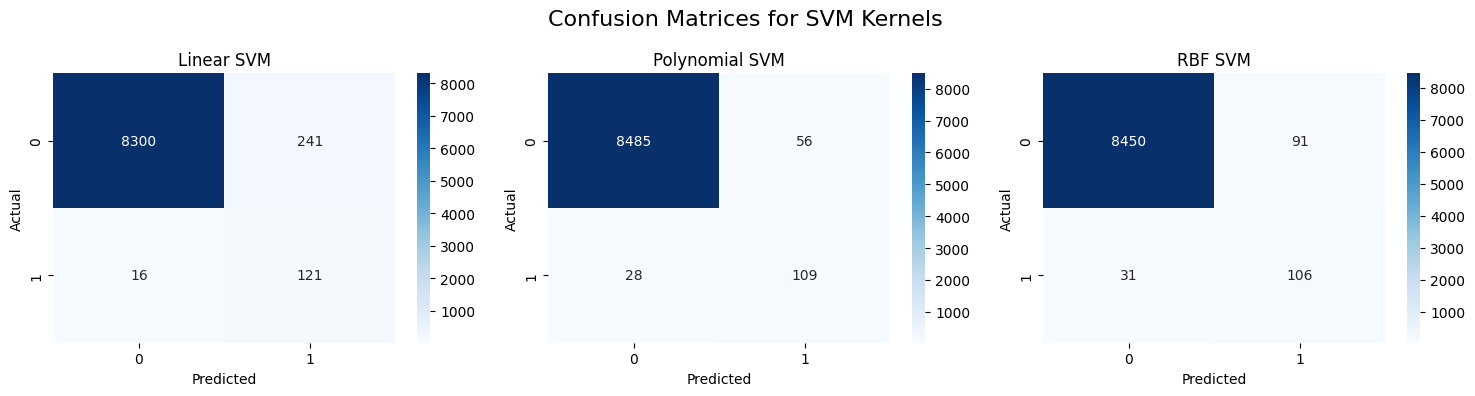

In [4]:
## Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

# Generate predictions for all models
models = {
    'Linear SVM': svcL_pipeline,
    'Polynomial SVM': svcPoly_pipeline, 
    'RBF SVM': svcRBF_pipeline
}

print("="*60)
print("SVM MODEL EVALUATION RESULTS")
print("="*60)

# Evaluate each model
for model_name, model in models.items():
    print(f"\n{model_name} Results:")
    print("-" * 40)
    
    # Get predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.decision_function(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    # Classification Report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    # Average Precision Score
    avg_precision = average_precision_score(y_test, y_pred_proba)
    print(f"Average Precision Score: {avg_precision:.4f}")
    
    print("\n" + "="*60)

# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Confusion Matrices for SVM Kernels', fontsize=16)

for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{model_name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()


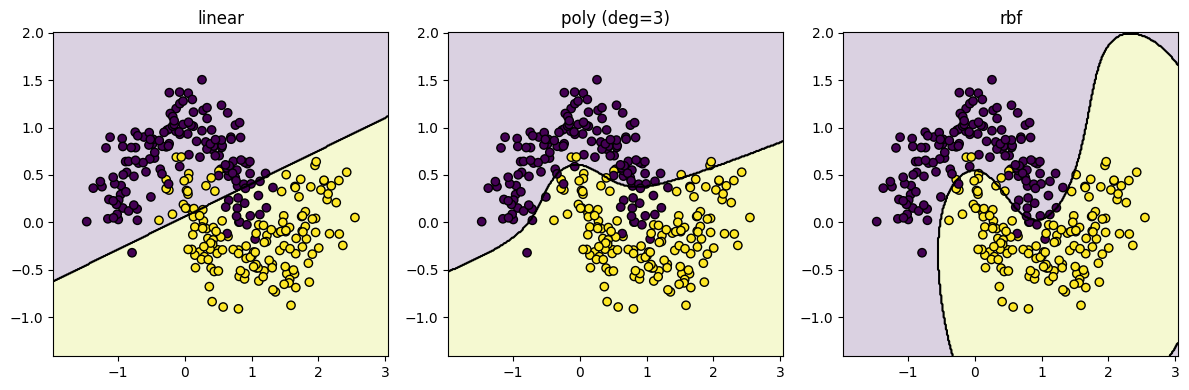

In [ ]:
## Decision Boundary

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.svm import SVC

# Create toy 2D dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# SVM with different kernels
models = {
    "linear": SVC(kernel="linear"),
    "poly (deg=3)": SVC(kernel="poly", degree=3),
    "rbf": SVC(kernel="rbf"),
}
for name, model in models.items():
    model.fit(X, y)

# Create meshgrid
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Plot decision boundaries
plt.figure(figsize=(12,4))
for i,(name, model) in enumerate(models.items(),1):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(1,3,i)
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.contour(xx, yy, Z, levels=[0.5], colors="black")
    plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k")
    plt.title(name)

plt.tight_layout()
plt.show()
